In [12]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [ ]:
batch_size = 1000
n_epochs = 501
feature_train = feature[:50000]
gt_train = gt[:50000]
feature_valid = feature[50000:60000]
gt_valid = gt[50000:60000]
feature_test = feature_test[:10000]
gt_test = gt_test[:10000]

In [6]:
e_files = glob.glob('../results/epoch11/e*')

In [7]:
e_files

['../results/epoch11/errors0.pkl.gz',
 '../results/epoch11/errors1.pkl.gz',
 '../results/epoch11/errors3.pkl.gz',
 '../results/epoch11/errors18.pkl.gz',
 '../results/epoch11/errors39.pkl.gz',
 '../results/epoch11/errors5.pkl.gz',
 '../results/epoch11/errors26.pkl.gz',
 '../results/epoch11/errors30.pkl.gz',
 '../results/epoch11/errors37.pkl.gz',
 '../results/epoch11/errors23.pkl.gz',
 '../results/epoch11/errors21.pkl.gz',
 '../results/epoch11/errors6.pkl.gz',
 '../results/epoch11/errors9.pkl.gz',
 '../results/epoch11/errors34.pkl.gz',
 '../results/epoch11/errors46.pkl.gz',
 '../results/epoch11/errors17.pkl.gz',
 '../results/epoch11/errors24.pkl.gz',
 '../results/epoch11/errors10.pkl.gz',
 '../results/epoch11/errors15.pkl.gz',
 '../results/epoch11/errors25.pkl.gz',
 '../results/epoch11/errors52.pkl.gz',
 '../results/epoch11/errors12.pkl.gz',
 '../results/epoch11/errors28.pkl.gz',
 '../results/epoch11/errors4.pkl.gz',
 '../results/epoch11/errors44.pkl.gz',
 '../results/epoch11/errors16.pk

In [13]:
Ex = namedtuple('Ex', 'filename train test time params')

In [14]:
ex = Ex(1)

TypeError: __new__() takes exactly 6 arguments (2 given)

In [22]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [35]:
ex_list[0]

['../results/epoch11/errors0.pkl.gz',
 array([ 0.0013178 ,  0.00106542,  0.00106892,  0.00101384,  0.00119422,
         0.00103931,  0.00101128,  0.00118136,  0.00119418,  0.00123009,
         0.00112025,  0.00095051,  0.00123725,  0.00120623,  0.00101776,
         0.00150327,  0.0011214 ,  0.00134281,  0.00131017,  0.0011006 ,
         0.00123297,  0.00107042,  0.00123716,  0.00117183,  0.00130046,
         0.00110903,  0.00097176,  0.00115441,  0.00125452,  0.0011627 ,
         0.00116713,  0.00120392,  0.00135514,  0.00119902,  0.00122633,
         0.00099605,  0.00101252,  0.00117645,  0.00107593,  0.00125569,
         0.00103845,  0.00106881,  0.00130076,  0.00129334,  0.00117935,
         0.00116896,  0.00101691,  0.00125097,  0.00088114,  0.00124175,
         0.00115656,  0.0010392 ]),
 array([ 0.04164462,  0.00251712,  0.00207924,  0.00211162,  0.00225179,
         0.00209483,  0.00207041,  0.00193066,  0.00227956,  0.00223782,
         0.00212136,  0.00222329,  0.00184324,  0.

In [ ]:
plt.plot([ex[4] for ex in ex_list], [ex[1][-1] for ex in ex_list], 'o')
plt.figure()
plt.plot([ex[4] for ex in ex_list], [ex[2][-1] for ex in ex_list], 'o')
plt.ylim(0, 0.004)

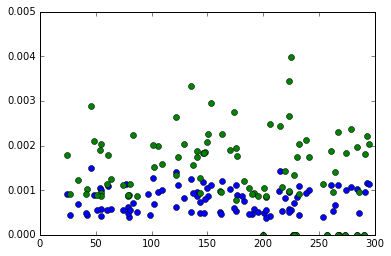

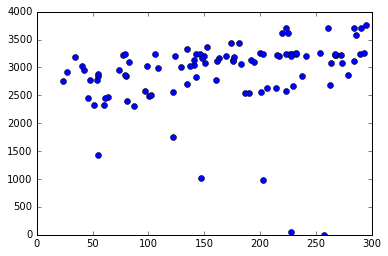

In [38]:
# n_hidden ほぼ効かず, n_hidden おおきいとたまにmemoryallocationおきてる, 100でいい
# かかる時間はじゃっかんn_hiddenおおきいと 長くなる
plt.plot([ex[4] for ex in ex_list], [ex[1][-1] for ex in ex_list], 'o')
plt.plot([ex[4] for ex in ex_list], [ex[2][-1] for ex in ex_list], 'o')
plt.ylim(0, 0.005)
plt.figure()
plt.plot([ex[4] for ex in ex_list], [ex[3] for ex in ex_list], 'o')

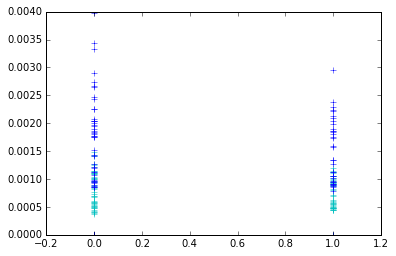

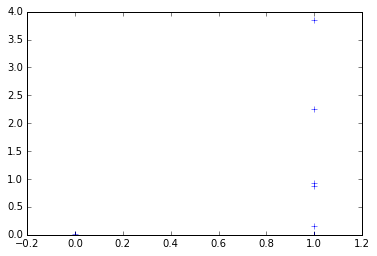

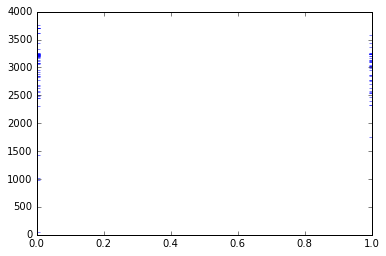

In [89]:
# retanhのほうができてる test errorは過学習してる, 速さ変わらん
plt.plot([int(ex[5] == ['relu', 'relu']) for ex in ex_list], [ex[1][-1] for ex in ex_list], 'c+')
plt.plot([int(ex[5] == ['relu', 'relu']) for ex in ex_list], [ex[2][-1] for ex in ex_list], '+')
plt.xlim(-0.2, 1.2)
plt.ylim(0, 0.004)
plt.figure()
plt.plot([int(ex[5] == ['relu', 'relu']) for ex in ex_list], [ex[1][-1] for ex in ex_list], 'c+')
plt.plot([int(ex[5] == ['relu', 'relu']) for ex in ex_list], [ex[2][-1] for ex in ex_list], '+')
plt.xlim(-0.2, 1.2)
plt.figure()
plt.plot([int(ex[5] == ['relu', 'relu']) for ex in ex_list], [ex[3] for ex in ex_list], '+')

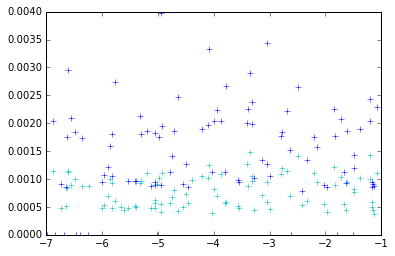

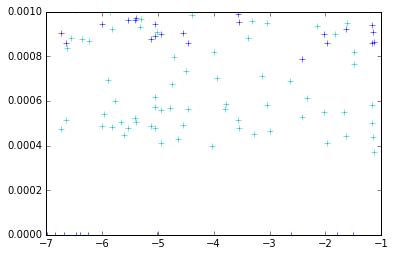

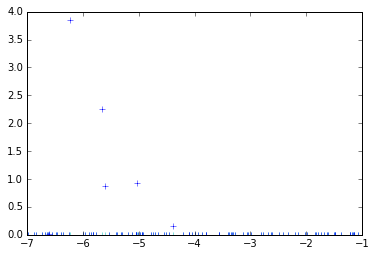

In [79]:
# l2 ほぼ効いてないけど高いほうがよさそう, 0だと学習不安定になる
plt.plot(np.log10([ex[6] for ex in ex_list]), [ex[1][-1] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[6] for ex in ex_list]), [ex[2][-1] for ex in ex_list], '+')

plt.ylim(0, 0.004)
plt.figure()
plt.plot(np.log10([ex[6] for ex in ex_list]), [ex[1][-1] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[6] for ex in ex_list]), [ex[2][-1] for ex in ex_list], '+')

plt.ylim(0, 0.001)
plt.figure()
plt.plot(np.log10([ex[6] for ex in ex_list]), [ex[1][-1] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[6] for ex in ex_list]), [ex[2][-1] for ex in ex_list], '+')


(0, 0.001)

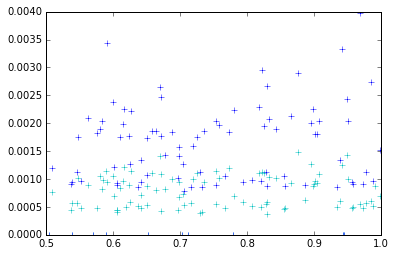

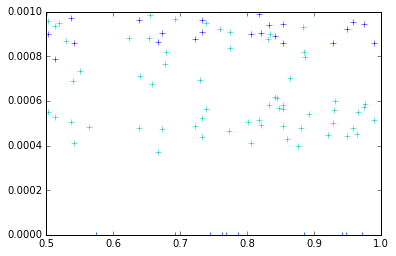

In [93]:
# dropout 0.7くらいがよさげ 
plt.plot([ex[7][0] for ex in ex_list], [ex[1][-1] for ex in ex_list], 'c+')
plt.plot([ex[7][0] for ex in ex_list], [ex[2][-1] for ex in ex_list], '+')
plt.ylim(0, 0.004)
plt.figure()
plt.plot([ex[7][1] for ex in ex_list], [ex[1][-1] for ex in ex_list], 'c+')
plt.plot([ex[7][1] for ex in ex_list], [ex[2][-1] for ex in ex_list], '+')
plt.ylim(0, 0.001)

(0, 0.004)

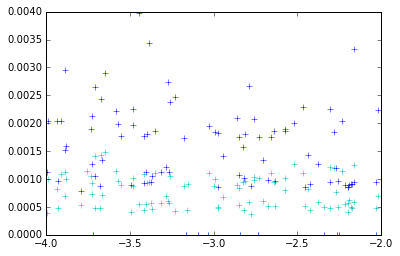

In [75]:
# alpha べつに0.001でいい
plt.plot(np.log10([ex[8] for ex in ex_list]), [ex[1][-1] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[8] for ex in ex_list]), [ex[2][-1] for ex in ex_list], '+')
plt.ylim(0, 0.004)

(0, 0.004)

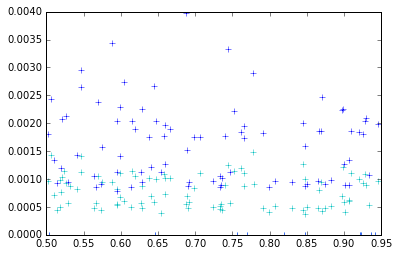

In [71]:
# beta1　しいて言えば 0.9, 0.9固定でいい
plt.plot([ex[9]for ex in ex_list], [ex[1][-1] for ex in ex_list], 'c+')
plt.plot([ex[9] for ex in ex_list], [ex[2][-1] for ex in ex_list], '+')
plt.ylim(0, 0.001)
plt.ylim(0, 0.004)

(0, 0.004)

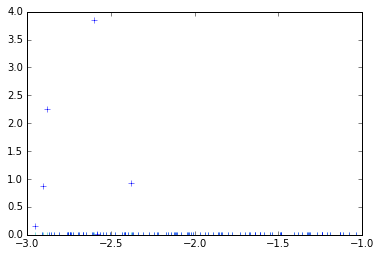

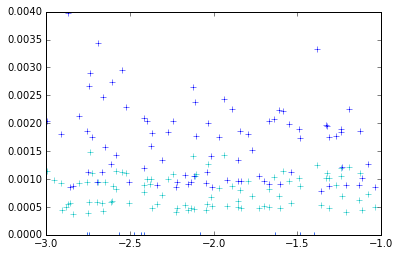

In [88]:
# lr_decay 小さいほうがいい けど高いほうがあんていする, このままでいいわ
plt.plot(np.log10([-1*(ex[10]-1)for ex in ex_list]), [ex[1][-1] for ex in ex_list], 'c+')
plt.plot(np.log10([-1*(ex[10]-1) for ex in ex_list]), [ex[2][-1] for ex in ex_list], '+')
plt.figure()
plt.plot(np.log10([-1*(ex[10]-1)for ex in ex_list]), [ex[1][-1] for ex in ex_list], 'c+')
plt.plot(np.log10([-1*(ex[10]-1) for ex in ex_list]), [ex[2][-1] for ex in ex_list], '+')
plt.ylim(0, 0.004)